In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QuantumCircuit
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline

In [10]:
def create_ghz(number_of_clients, qc):
    qc.h(0)
    for i in range(number_of_clients-1):
        qc.cx(i, i+1)
    qc.barrier()
    return qc

In [11]:
def encode_data(sender, data, qc):
    if data == 0:
        qc.id(sender)
    elif data == 1:
        qc.z(sender)
    qc.barrier()
    return qc

In [12]:
def decoding(number_of_clients, qc):
    clients = [x for x in range(number_of_clients)]
    qc.h(clients)
    return qc

In [13]:
def measurement(q_reg, c_reg, qc):
    qc.measure(q_reg, c_reg)
    return qc

In [14]:
def create_circuit(number_of_clients, sender, data):
    q_reg = QuantumRegister(number_of_clients)
    c_reg = ClassicalRegister(number_of_clients)
    qc = QuantumCircuit(q_reg, c_reg)
    qc = create_ghz(number_of_clients, qc)
    qc = encode_data(sender, data, qc)
    qc = decoding(number_of_clients, qc)
    qc = measurement(q_reg, c_reg, qc)
    return qc

In [15]:
def execute(qc, shots):
    sim = AerSimulator()
    results = sim.run(qc, shots=shots).result()
    return results

In [16]:
number_of_clients = 5
sender = 2
data = 1
shots = 1024

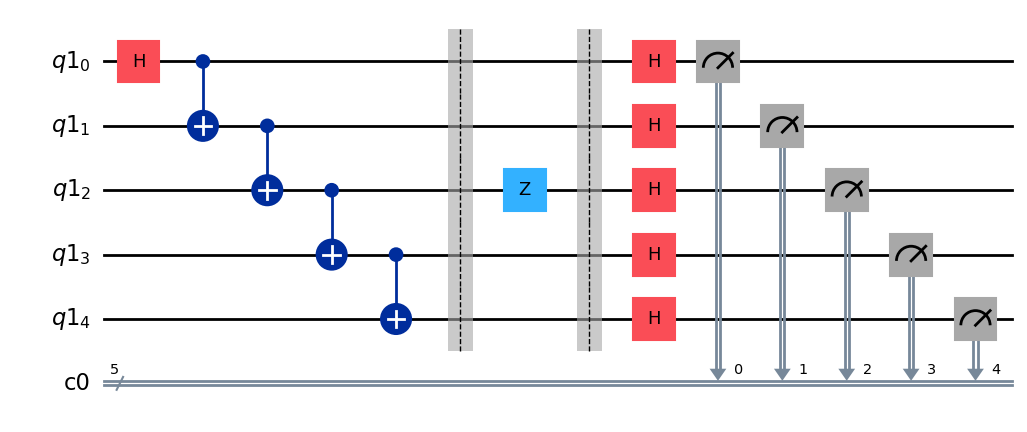

In [17]:
if __name__ == "__main__":
    qc = create_circuit(number_of_clients, sender, data)
    qc.draw("mpl")
    results = execute(qc, shots)
    

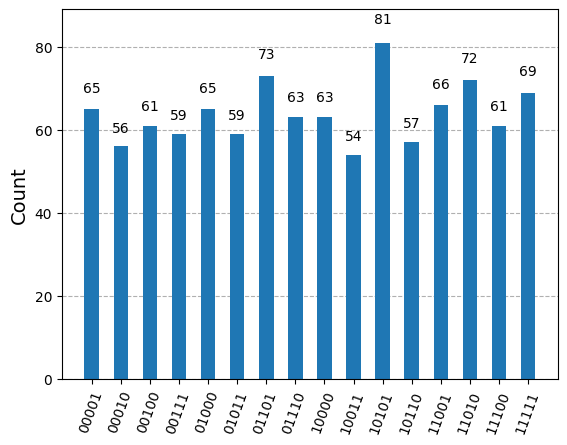

In [18]:
counts = results.get_counts()
hist = plot_histogram(counts)